* Resize a 3D image
* Make depth N

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2

In [3]:
raw_images = []

for i in range(1,3):
    img_3d = None
    img_3d = np.load("img_datas_1/{}.npy".format(i))
    raw_images.append(img_3d)
    
print(len(raw_images))

2


In [4]:
img_3d = raw_images[1]
img_3d.shape

(512, 512, 122)

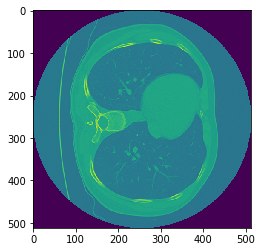

In [6]:
plt.imshow(img_3d[:,:,50])

In [7]:
img_3d.shape

(512, 512, 122)

In [8]:
w, h = 128, 128

def rs_img(img):
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img

In [9]:
img_rs = rs_img(img_3d)
img_rs.shape

(128, 128, 122)

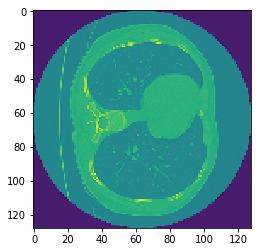

In [11]:
plt.imshow(img_rs[:,:,50])

In [23]:
img_3d.shape

(512, 512, 122)

In [24]:
int(img_3d.shape[-1]/2)

61

In [25]:
img_start = img_3d[:,:,:8]

mid = int(img_3d.shape[-1]/2)
img_middle = img_3d[:,:,mid-4:mid+4]
img_end = img_3d[:,:,-8:]

In [26]:
img_start.shape, img_middle.shape, img_end.shape

((512, 512, 8), (512, 512, 8), (512, 512, 8))

In [34]:
img_recon = np.concatenate((img_start, img_middle, img_end), axis=2)
img_recon.shape

(512, 512, 24)

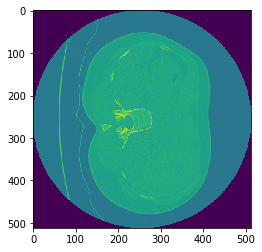

In [40]:
plt.imshow(img_recon[:,:,0])

In [50]:
def change_depth(img):
    img_start = img[:,:,:8]
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-4:mid+4]
    img_end = img[:,:,-8:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    #print(img.shape)
    return img
    

In [51]:
img = None
img = change_depth(img_3d)
img.shape

(512, 512, 24)